# Week 2 class

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/goodman-imperial/discrete-maths-classes/blob/main/week-2-class.ipynb)

In this week's class we'll dive into the prime factoring algorithm and see how different algorithmic choices can affect performance.

We'll start by importing some standard libraries, don't worry about understanding this if you don't speak Python.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Now we'll do the stupidest possible algorithm to count the number of primes less than n. This algorithm is even stupider than the one from the videos. See if you can understand how it works and why it's even stupider.

In [27]:
global operation_count
operation_count = 0

def stupidest_num_primes_less_than(n):
    global operation_count
    operation_count = 0

    def is_prime(n):
        global operation_count
        operation_count += 1
        if n == 1:
            operation_count += 1
            return False
        operation_count += 1
        no_factors = True
        for j in range(2, n):
            operation_count += 1
            if n % j == 0:
                operation_count += 1
                no_factors = False
        operation_count += 1
        return no_factors
    operation_count += 1
    count = 0
    for i in range(2, n + 1):
        operation_count += 1
        if is_prime(i):
            operation_count += 1
            count += 1


    operation_count += 1
    print(operation_count)
    return count

print(stupidest_num_primes_less_than(100))

print(operation_count)


5557
25
5557


Now we're going to plot the number of primes less than n and the same thing on a log-log plot. Later, we'll do some more plotting, and you can just re-use this code with slight modifications.

We also fit a best fit line to the log-log plot. Why is this useful? It gives us a rough idea of how fast the algorithm is growing (although it's not perfect). How does that work? Well, suppose that $\log y = a \log x + b$ for some constants $a$ and $b$, then by taking exponentials of both sides we can see that $y=e^b x^a$, in other words $y=\Theta(x^a)$ in complexity notation. So the slope of the best fit line of a log-log plot gives you an approximate value for the polynomial power if the function grows like a polynomial.

WARNING! This will give you a value even if the growth is NOT polynomial. Indeed, the examples below are not polynomial, this is just to get a rough idea of how quickly they're growing.

7
13
20
28
38
48
60
72
86
100
118
134
152
171
192
212
236
258
284
309
335
361
393
421
451
482
516
548
586
620
658
695
733
772
817
857
899
942
990
1034
1084
1130
1180
1231
1281
1331
1389
1441
1497
1552
1610
1666
1728
1787
1851
1912
1974
2036
2108
2172
2238
2307
2378
2447
2521
2591
2665
2738
2816
2890
2974
3050
3128
3209
3291
3372
3458
3540
3630
3716
3802
3888
3984
4073
4163
4254
4350
4442
4544
4639
4737
4834
4932
5031
5139
5239
5343
5448
5557


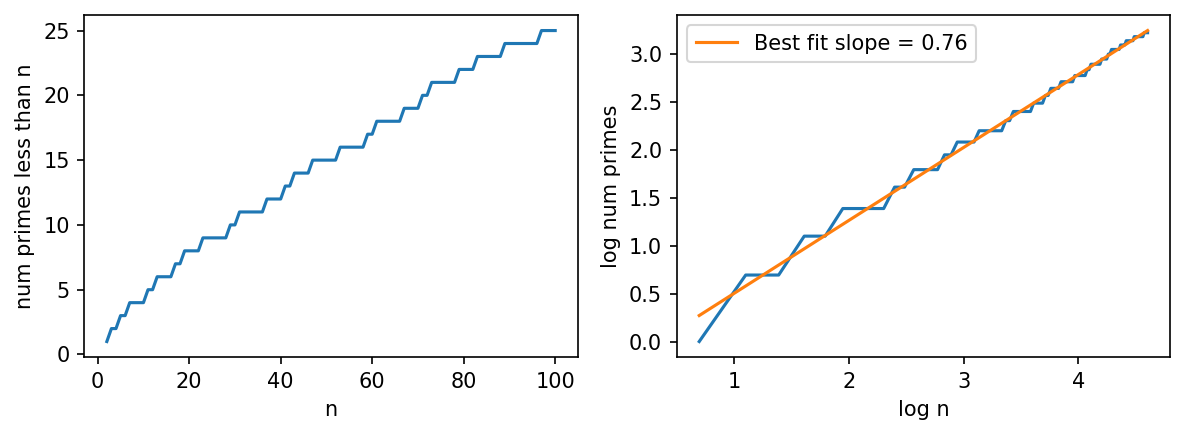

In [28]:

# x axis will be n, the integers from 2 to 1000
N = np.arange(2, 101)
# y axis will be the number of primes less than n
#numprimes = np.array([stupidest_num_primes_less_than(n) for n in N])
numprimes = []
execs = []

for n in N:
  numprimes.append(stupidest_num_primes_less_than(n))
  execs.append(operation_count)

# Matplotlib code (feel free to reuse)
plt.figure(figsize=(8, 3), dpi=150)      # create a figure with width 8 and height 3
plt.subplot(121)                         # first subplot on the left
plt.plot(N, numprimes)                   # plot N on the x-axis and numprimes on the y-axis
plt.xlabel('n')                          # label axes
plt.ylabel('num primes less than n')
plt.subplot(122)                         # second subplot on the right will be log-log
plt.plot(np.log(N), np.log(numprimes))   # np.log uses function log from numpy package
# Now we fit a line (polynomial of degree 1) to the log-log data
# this returns [slope, intercept] of the best fit line
slope, intercept = np.polyfit(np.log(N), np.log(numprimes), 1)
plt.plot(np.log(N), slope*np.log(N)+intercept, label=f'Best fit slope = {slope:.2f}')
# then we label it
plt.xlabel('log n')
plt.ylabel('log num primes')
plt.legend(loc='best')
plt.tight_layout(); # and this makes everything use space nicely

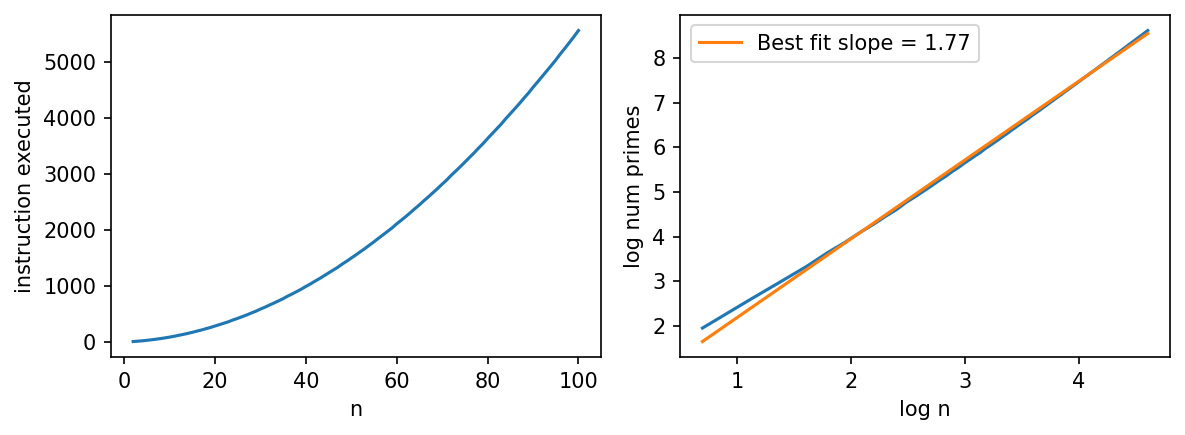

In [29]:
# Matplotlib code (feel free to reuse)
plt.figure(figsize=(8, 3), dpi=150)      # create a figure with width 8 and height 3
plt.subplot(121)                         # first subplot on the left
plt.plot(N, execs)                   # plot N on the x-axis and numprimes on the y-axis
plt.xlabel('n')                          # label axes
plt.ylabel('instruction executed')
plt.subplot(122)                         # second subplot on the right will be log-log
plt.plot(np.log(N), np.log(execs))   # np.log uses function log from numpy package
# Now we fit a line (polynomial of degree 1) to the log-log data
# this returns [slope, intercept] of the best fit line
slope, intercept = np.polyfit(np.log(N), np.log(execs), 1)
plt.plot(np.log(N), slope*np.log(N)+intercept, label=f'Best fit slope = {slope:.2f}')
# then we label it
plt.xlabel('log n')
plt.ylabel('log num primes')
plt.legend(loc='best')
plt.tight_layout(); # and this makes everything use space nicely

# Class questions

## Q1: Count and plot the number of operations

The first task is to add code to the prime counting function to count the number of operations it does. Here's an example for a different function you can adapt.

In [30]:
operation_count = 0

def sum_of_n(n):
    global operation_count
    sum = 0
    operation_count += 1 # we set sum to 0
    for i in range(1, n+1):
        operation_count += 2 # we add 1 to i and compare to n+1
        sum += i
        operation_count += 1 # we add i to sum
    return sum

print(sum_of_n(20))
print(operation_count)

210
61


In this function you can see that the global variable ``operation_count`` starts at 0 and is increased repeatedly while the function is called. We've added 2 and then 1 in the loop body, but actually because constants don't matter for complexity notation, you can just add 1 in the loop body.

Right, now go ahead and adapt this idea to count the number of operations in ``stupidest_num_primes_less_than(n)``, and plot that and fit a best line to the log-log plot as above (just adapt that code).

Does it do what you'd expect from the lecture videos?

## Version from lectures

Now modify your code to use the slightly less naive algorithm given in the lectures, where you break out of the inner loop once you find that a number is not prime. Analyse this. How does it compare?

In [24]:
global operation_count
operation_count = 0

def stupid_num_primes_less_than(n):
    global operation_count
    operation_count = 0

    def is_prime(n):
        global operation_count
        operation_count += 1
        if n == 1:
            operation_count += 1
            return False
        operation_count += 1
        no_factors = True
        for j in range(2, n):
            operation_count += 1
            if n % j == 0:
                operation_count += 1
                no_factors = False
                break;
        operation_count += 1
        return no_factors
    operation_count += 1
    count = 0
    for i in range(2, n + 1):
        operation_count += 1
        if is_prime(i):
            operation_count += 1
            count += 1


    operation_count += 1
    print(operation_count)
    return count

print(stupid_num_primes_less_than(100))

1630
25


## Prime factor algorithm

Actually, to check if a number $n$ is prime, you don't need to just every possible factor below $n$, only up to $\sqrt{n}$. Why? Because if $m$ is a factor of $n$, then $n/m$ must also be a factor, and at least one of $m$ or $n/m$ must be smaller than $\sqrt{n}$. If both $m$ and $n/m$ were larger than $\sqrt{n}$ then the product of them both would be larger than $n$, but the product is just $n$.

Adapt your code to use this idea and compare its performance. This is known as the prime factor algorithm.

In [36]:
import math
global operation_count
operation_count = 0

def less_stupid_num_primes_less_than(n):
    global operation_count
    operation_count = 0

    def is_prime(n):
        global operation_count
        operation_count += 1
        if n == 1:
            operation_count += 1
            return False
        operation_count += 1
        no_factors = True
        for j in range(2, math.trunc(np.sqrt(n)+1)):
            operation_count += 1
            if n % j == 0:
                operation_count += 1
                no_factors = False
                break;
        operation_count += 1
        return no_factors
    operation_count += 1
    count = 0
    for i in range(2, n + 1):
        operation_count += 1
        if is_prime(i):
            operation_count += 1
            count += 1


    operation_count += 1
    print(operation_count)
    return count

print(less_stupid_num_primes_less_than(100))

733
25


## Sieve of Eratosthenes

Finally, a much better algorithm is like the table method for the Fibonacci series. Rather than recomputing from scratch each time whether a number is prime, we re-use the calculations we've already made. In this case, start with a table of values saying all values from 2 to $n$ are prime. Loop through this from 2 to $n$, and if your value is prime, set all the multiples of it to be False. So in the first step you'd see that ``isprime[2]==True`` so you'd set ``isprime[4] = False``, ``isprime[6] = False`` and so on. Keep going until you've got to $\sqrt{n}$ and then count the number of values where ``isprime`` is True.

This algorithm is called the Sieve of Eratosthenes. Implement this algorithm and compare its performance.

In [47]:
def sieve_eratosthenes(n):
  operation_count += 1
  is_prime = np.full(n+1, True)
  operation_count += 1
  is_prime[0], is_prime[1] = False, False
  operation_count += 1
  count = 0

  for i in range(2, math.trunc(np.sqrt(n))+1):
    operation_count += 1
    if is_prime[i]:
     for j in range(i*i, n+1, i):
      operation_count += 1
      is_prime[j] = False
  for x in is_prime:
    operation_count += 1
    if (x):
      operation_count += 1
      count += 1
  return count

print(sieve_eratosthenes(100))







25


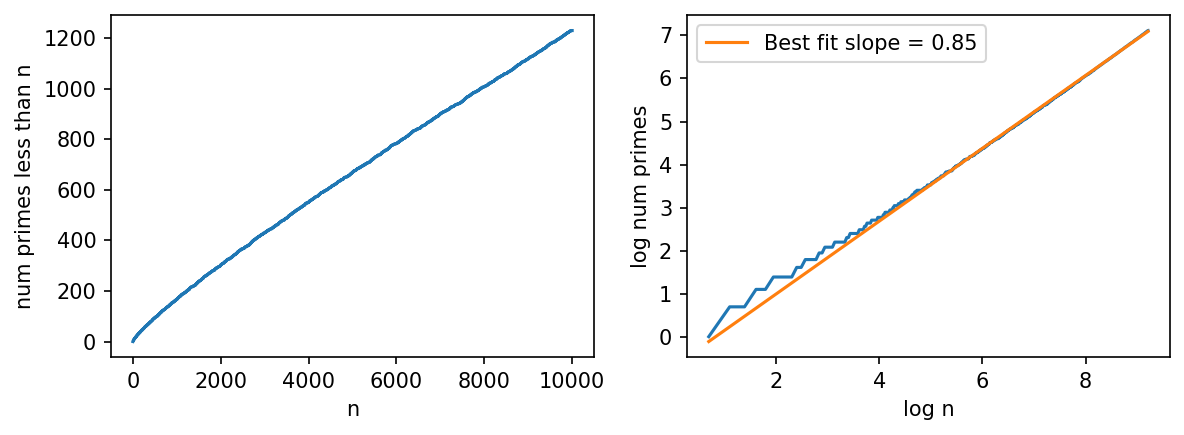

In [50]:

# x axis will be n, the integers from 2 to 1000
N = np.arange(2, 10001)
# y axis will be the number of primes less than n
#numprimes = np.array([stupidest_num_primes_less_than(n) for n in N])
numprimes = []
execs = []

for n in N:
  numprimes.append(sieve_eratosthenes(n))
  execs.append(operation_count)

# Matplotlib code (feel free to reuse)
plt.figure(figsize=(8, 3), dpi=150)      # create a figure with width 8 and height 3
plt.subplot(121)                         # first subplot on the left
plt.plot(N, numprimes)                   # plot N on the x-axis and numprimes on the y-axis
plt.xlabel('n')                          # label axes
plt.ylabel('num primes less than n')
plt.subplot(122)                         # second subplot on the right will be log-log
plt.plot(np.log(N), np.log(numprimes))   # np.log uses function log from numpy package
# Now we fit a line (polynomial of degree 1) to the log-log data
# this returns [slope, intercept] of the best fit line
slope, intercept = np.polyfit(np.log(N), np.log(numprimes), 1)
plt.plot(np.log(N), slope*np.log(N)+intercept, label=f'Best fit slope = {slope:.2f}')
# then we label it
plt.xlabel('log n')
plt.ylabel('log num primes')
plt.legend(loc='best')
plt.tight_layout(); # and this makes everything use space nicely

In [ ]:
# x axis will be n, the integers from 2 to 1000
N = np.arange(2, 10001)
# y axis will be the number of primes less than n
#numprimes = np.array([stupidest_num_primes_less_than(n) for n in N])
numprimes = []
execs = []

for n in N:
  numprimes.append(sieve_eratosthenes(n))
  execs.append(operation_count)

# Matplotlib code (feel free to reuse)
plt.figure(figsize=(8, 3), dpi=150)      # create a figure with width 8 and height 3
plt.subplot(121)                         # first subplot on the left
plt.plot(N, numprimes)                   # plot N on the x-axis and numprimes on the y-axis
plt.xlabel('n')                          # label axes
plt.ylabel('num primes less than n')
plt.subplot(122)                         # second subplot on the right will be log-log
plt.plot(np.log(N), np.log(numprimes))   # np.log uses function log from numpy package
# Now we fit a line (polynomial of degree 1) to the log-log data
# this returns [slope, intercept] of the best fit line
slope, intercept = np.polyfit(np.log(N), np.log(numprimes), 1)
plt.plot(np.log(N), slope*np.log(N)+intercept, label=f'Best fit slope = {slope:.2f}')
# then we label it
plt.xlabel('log n')
plt.ylabel('log num primes')
plt.legend(loc='best')
plt.tight_layout(); # and this makes everything use space nicely

## Comparison

Finally, plot all the algorithms on the same axes to compare their performance.